# Proyecto 1

In [141]:
!pip install scikit-learn

In [142]:
# importar pandas numpy sklearn
import pandas as pd
import numpy as np

In [143]:
link_database = ' http://brl.bcm.tmc.edu/rme/gbm.dat'

# Descarga el archivo de la base de datos
import urllib.request
urllib.request.urlretrieve(link_database, 'gbm.dat')

('gbm.dat', <http.client.HTTPMessage at 0x1e367757f90>)

In [144]:
# Lee el archivo con pandas
data = pd.read_csv('gbm.dat', sep='\t')
columns = data.columns
data.describe()

,TCGA-02-0001,TCGA-02-0003,TCGA-02-0006,TCGA-02-0007,TCGA-02-0009,TCGA-02-0010,TCGA-02-0011,TCGA-02-0014,TCGA-02-0015,TCGA-02-0016,...,TCGA-08-0373,TCGA-08-0375,TCGA-08-0380,TCGA-08-0386,TCGA-08-0389,TCGA-08-0390,TCGA-12-0616,TCGA-12-0618,TCGA-12-0619,TCGA-12-0620
count,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,...,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000
mean,0.012915,0.044280,0.012915,0.083026,0.018450,0.127306,0.014760,0.062731,0.081181,0.068266,...,0.011070,0.036900,0.020295,0.007380,0.029520,0.020295,0.009225,0.018450,0.011070,0.014760
std,0.113013,0.205908,0.113013,0.276176,0.134697,0.333624,0.120703,0.242702,0.273365,0.252434,...,0.104727,0.188691,0.141138,0.085669,0.169416,0.141138,0.095692,0.134697,0.104727,0.120703
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [145]:
data.head()

,Unnamed: 0,TCGA-02-0001,TCGA-02-0003,TCGA-02-0006,TCGA-02-0007,TCGA-02-0009,TCGA-02-0010,TCGA-02-0011,TCGA-02-0014,TCGA-02-0015,...,TCGA-08-0373,TCGA-08-0375,TCGA-08-0380,TCGA-08-0386,TCGA-08-0389,TCGA-08-0390,TCGA-12-0616,TCGA-12-0618,TCGA-12-0619,TCGA-12-0620
0,ZNF708,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,XPOT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,RNF38,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CCT2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,INSR,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Constructing a gene network with Winnow

In [146]:
#The first step in our module detection pipeline was to filter the mutation matrix and retain only genes that meet a set frequency of recurrence, as genes altered in only one or a few samples do not contain enough information to calculate meaningful exclusivity scores.

filtered_data = data.loc[:, (data != 0).sum() > 5]
filtered_data.head()

,Unnamed: 0,TCGA-02-0001,TCGA-02-0003,TCGA-02-0006,TCGA-02-0007,TCGA-02-0009,TCGA-02-0010,TCGA-02-0011,TCGA-02-0014,TCGA-02-0015,...,TCGA-08-0358,TCGA-08-0359,TCGA-08-0373,TCGA-08-0375,TCGA-08-0380,TCGA-08-0389,TCGA-08-0390,TCGA-12-0618,TCGA-12-0619,TCGA-12-0620
0,ZNF708,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,XPOT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,RNF38,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CCT2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,INSR,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
# Diferencia entre los datos originales y los datos filtrados
print(data.shape)
print(filtered_data.shape)

print(data.columns)
print(filtered_data.columns)

(542, 146)
(542, 119)
Index(['Unnamed: 0', 'TCGA-02-0001', 'TCGA-02-0003', 'TCGA-02-0006',
       'TCGA-02-0007', 'TCGA-02-0009', 'TCGA-02-0010', 'TCGA-02-0011',
       'TCGA-02-0014', 'TCGA-02-0015',
       ...
       'TCGA-08-0373', 'TCGA-08-0375', 'TCGA-08-0380', 'TCGA-08-0386',
       'TCGA-08-0389', 'TCGA-08-0390', 'TCGA-12-0616', 'TCGA-12-0618',
       'TCGA-12-0619', 'TCGA-12-0620'],
      dtype='object', length=146)
Index(['Unnamed: 0', 'TCGA-02-0001', 'TCGA-02-0003', 'TCGA-02-0006',
       'TCGA-02-0007', 'TCGA-02-0009', 'TCGA-02-0010', 'TCGA-02-0011',
       'TCGA-02-0014', 'TCGA-02-0015',
       ...
       'TCGA-08-0358', 'TCGA-08-0359', 'TCGA-08-0373', 'TCGA-08-0375',
       'TCGA-08-0380', 'TCGA-08-0389', 'TCGA-08-0390', 'TCGA-12-0618',
       'TCGA-12-0619', 'TCGA-12-0620'],
      dtype='object', length=119)


In [148]:
# Calculate the exclusivity score between each pair of genes, defined as the number of samples where exactly one of the pair is mutated divided by the number of samples where at least one of the pair is mutated.

# Diccionario sample -> genes mutados
sample_genes = {}

num_exclusive_samples = 0
num_samples = 0

# Recorre las muestras y muestra los genes que estan mutados
for index, row in filtered_data.iterrows():
    num_samples = len(row[row != 0])
    sample_genes[index] = row[row != 0]
    #gen = row[0], sample = row[1:]
    if num_samples == 1:
        num_exclusive_samples += 1
        print('Sample:', index, 'Number of mutated genes:', num_samples)
        print('Mutated genes:', row[row != 0])

Sample: 4 Number of mutated genes: 1
Mutated genes: Unnamed: 0    INSR
Name: 4, dtype: object
Sample: 25 Number of mutated genes: 1
Mutated genes: Unnamed: 0    SLC16A1
Name: 25, dtype: object
Sample: 30 Number of mutated genes: 1
Mutated genes: Unnamed: 0    PRNP
Name: 30, dtype: object
Sample: 56 Number of mutated genes: 1
Mutated genes: Unnamed: 0    VHL
Name: 56, dtype: object
Sample: 84 Number of mutated genes: 1
Mutated genes: Unnamed: 0    ANKMY2
Name: 84, dtype: object
Sample: 141 Number of mutated genes: 1
Mutated genes: Unnamed: 0    C20orf160
Name: 141, dtype: object
Sample: 169 Number of mutated genes: 1
Mutated genes: Unnamed: 0    IRAK3
Name: 169, dtype: object
Sample: 182 Number of mutated genes: 1
Mutated genes: Unnamed: 0    FRZB
Name: 182, dtype: object
Sample: 238 Number of mutated genes: 1
Mutated genes: Unnamed: 0    WT1
Name: 238, dtype: object
Sample: 299 Number of mutated genes: 1
Mutated genes: Unnamed: 0    TES
Name: 299, dtype: object
Sample: 397 Number of mu

In [149]:
for sample, genes in sample_genes.items():
    print('Sample:', sample, 'Genes:', genes)

Sample: 0 Genes: Unnamed: 0      ZNF708
TCGA-02-0055         1
TCGA-06-0143         1
TCGA-06-0159         1
TCGA-06-0169         1
TCGA-06-0173         1
TCGA-06-0190         1
Name: 0, dtype: object
Sample: 1 Genes: Unnamed: 0      XPOT
TCGA-06-0176       1
Name: 1, dtype: object
Sample: 2 Genes: Unnamed: 0      RNF38
TCGA-06-0138        1
Name: 2, dtype: object
Sample: 3 Genes: Unnamed: 0      CCT2
TCGA-02-0099       1
Name: 3, dtype: object
Sample: 4 Genes: Unnamed: 0    INSR
Name: 4, dtype: object
Sample: 5 Genes: Unnamed: 0      ESR2
TCGA-02-0011       1
TCGA-08-0373       1
Name: 5, dtype: object
Sample: 6 Genes: Unnamed: 0      ATP1A2
TCGA-02-0083         1
Name: 6, dtype: object
Sample: 7 Genes: Unnamed: 0      DGKD
TCGA-02-0114       1
Name: 7, dtype: object
Sample: 8 Genes: Unnamed: 0      chr6:168107192-168276703
TCGA-02-0003                           1
TCGA-02-0007                           1
TCGA-02-0015                           1
TCGA-02-0027                           1

In [150]:
# Calculate the exclusivity score between each pair of genes, defined as the number of samples where exactly one of the pair is mutated divided by the number of samples where at least one of the pair is mutated.

# number of samples where at least one of the pair is mutated
num_samples = len(sample_genes)
print('Number of samples:', num_samples)

# number of samples where exactly one of the pair is mutated
print('Number of exclusive samples:', num_exclusive_samples)

# Calculate the exclusivity score between each pair of genes
exclusivity_scores = np.zeros((len(filtered_data.columns), len(filtered_data.columns)))
for i, gene1 in enumerate(filtered_data.columns):
    for j, gene2 in enumerate(filtered_data.columns):
        if i == j:
            continue
        num_samples_where_both_mutated = 0
        num_samples_where_one_mutated = 0
        for sample, genes in sample_genes.items():
            if gene1 in genes and gene2 in genes:
                num_samples_where_both_mutated += 1
            if gene1 in genes or gene2 in genes:
                num_samples_where_one_mutated += 1
        exclusivity_scores[i, j] = num_samples_where_both_mutated / num_samples_where_one_mutated


Number of samples: 542
Number of exclusive samples: 13


In [151]:
exclusivity_scores

array([[0.        , 0.01291513, 0.04428044, ..., 0.01845018, 0.01107011,
        0.01476015],
       [0.01291513, 0.        , 0.10714286, ..., 0.30769231, 0.18181818,
        0.25      ],
       [0.04428044, 0.10714286, 0.        , ..., 0.21428571, 0.11111111,
        0.03225806],
       ...,
       [0.01845018, 0.30769231, 0.21428571, ..., 0.        , 0.14285714,
        0.2       ],
       [0.01107011, 0.18181818, 0.11111111, ..., 0.14285714, 0.        ,
        0.        ],
       [0.01476015, 0.25      , 0.03225806, ..., 0.2       , 0.        ,
        0.        ]])

These data could be used to create a network where each node is a gene and each edge weight is the exclusivity between the genes.
The highly connected sub-networks would then be used as a starting point for a focused combinatorial search for modules. The disadvantage of this approach is that the networks quickly becomes much too large and densely connected to effectively identify sub-network

In [152]:
import networkx as nx
import matplotlib.pyplot as plt

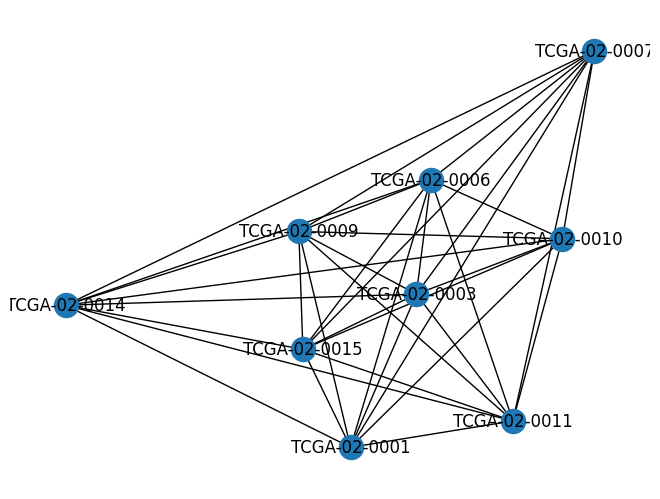

In [163]:
# These data could be used to create a network where each node is a gene and each edge weight is the exclusivity between the genes.
#The highly connected sub-networks would then be used as a starting point for a focused combinatorial search for modules. The disadvantage of this approach is that the networks quickly becomes much too large and densely connected to effectively identify sub-network

def network_from_exclusivity_scores(exclusivity_scores, genes):
    G = nx.Graph()
    for i, gene1 in enumerate(genes):
        for j, gene2 in enumerate(genes):
            if i == j:
                continue
            G.add_edge(gene1, gene2, weight=exclusivity_scores[i, j])

    pos = nx.spring_layout(G)
    nx.draw(G, pos)
    # Labels en los nodos
    nx.draw_networkx_labels(G, pos)
    plt.show()

network_from_exclusivity_scores(exclusivity_scores, filtered_data.columns[1:10])

These data could be used to create a network where each node is a gene and
each edge weight is the exclusivity between the genes.
The highly connected sub-networks would then be used
as a starting point for a focused combinatorial search for
modules. The disadvantage of this approach is that the
networks quickly becomes much too large and densely
connected to effectively identify sub-networks

In [ ]:
#Thus, we used an online-learning linear threshold algorithm called Winnow to detect signals of exclusivity
# against the noisy background of passenger mutations in many irrelevant genes

#The Winnow algorithm is a linear threshold algorithm that is used for online learning. It is a variant of the Perceptron algorithm that is designed to work with binary features. The algorithm is based on the idea of a “window” of features that are used to make a prediction. The window is updated at each iteration of the algorithm, and the weights of the features are updated based on the prediction made by the algorithm.
